# Click Through Rate Prediction Model

libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [209]:
data = pd.read_csv(r'C:\Users\hp\Downloads\ctr\ctr\ad_10000records.csv')

In [210]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [212]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [213]:
data.Timestamp=pd.to_datetime(data.Timestamp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  10000 non-null  float64       
 1   Age                       10000 non-null  float64       
 2   Area Income               10000 non-null  float64       
 3   Daily Internet Usage      10000 non-null  float64       
 4   Ad Topic Line             10000 non-null  object        
 5   City                      10000 non-null  object        
 6   Gender                    10000 non-null  object        
 7   Country                   10000 non-null  object        
 8   Timestamp                 10000 non-null  datetime64[ns]
 9   Clicked on Ad             10000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 781.4+ KB


In [214]:
data.nunique().sort_values(ascending=False)

Timestamp                   567
Ad Topic Line               559
Area Income                 524
City                        521
Daily Internet Usage        505
Daily Time Spent on Site    460
Country                     207
Age                          39
Gender                        2
Clicked on Ad                 2
dtype: int64

use of one hot encoding

In [19]:
data = pd.get_dummies(data["Gender"])
data

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,1,0


use map function

In [26]:
data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No", 1: "Yes"})
data["Gender"] = data["Gender"].map({"Male": 1,"Female": 0})

use replace 

In [215]:
#data=data.replace("Yes",1)
#data=data.replace("No",0)
data=data.replace("Male",1)
data=data.replace("Female",0)

In [242]:
data["Gender"].value_counts()

0    5376
1    4624
Name: Gender, dtype: int64

## Calculating CTR of Ads

In [216]:
data["Clicked on Ad"].value_counts()

0    5083
1    4917
Name: Clicked on Ad, dtype: int64

In [217]:
click_through_rate = 4917 / 10000 * 100
print("CTR is :",click_through_rate)

CTR is : 49.17


In [218]:
for i in ['Clicked on Ad', 'Country', 'City','Gender']: 
    print(i)
    print(round(data[i].value_counts()*100/10000,2),'\n')

Clicked on Ad
0    50.83
1    49.17
Name: Clicked on Ad, dtype: float64 

Country
Australia                                       3.88
Czech Republic                                  3.30
Turkey                                          3.12
Qatar                                           2.24
Hong Kong                                       2.21
                                                ... 
South Georgia and the South Sandwich Islands    0.01
Wallis and Futuna                               0.01
Sierra Leone                                    0.01
Niue                                            0.01
Paraguay                                        0.01
Name: Country, Length: 207, dtype: float64 

City
Hubbardmouth       3.36
West Brandonton    2.75
Lisafort           2.61
Wintersfort        2.30
Stewartbury        2.07
                   ... 
Turnerview         0.01
North Tiffany      0.01
North Kristine     0.01
East Troyhaven     0.01
Davidview          0.01
Name: City, Length: 5

0    5083
1    4917
Name: Clicked on Ad, dtype: int64




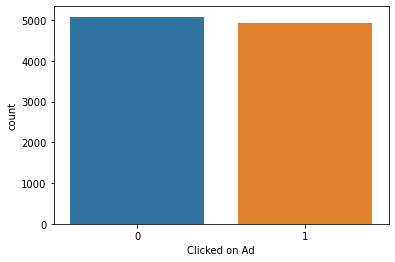

In [219]:
print(data['Clicked on Ad'].value_counts())
print("\n")
plt.figure()
sns.countplot(x='Clicked on Ad', data=data)
plt.show()

Text(0.5, 1.0, 'Pairwise Correlations')

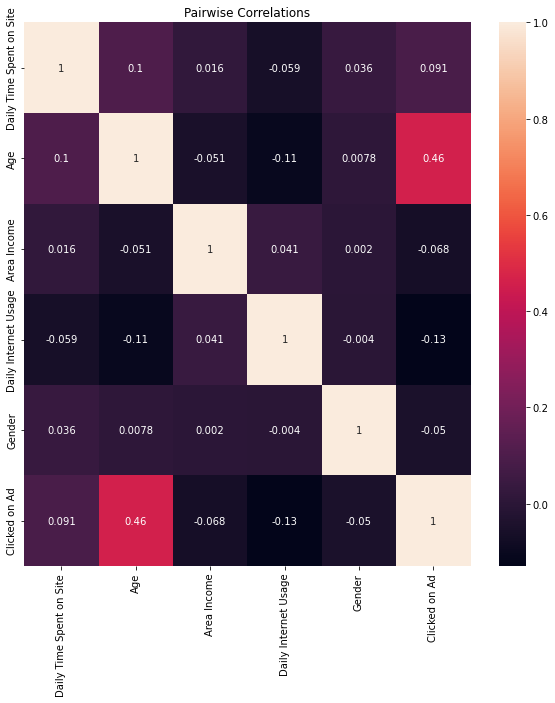

In [220]:
corr = data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True)
plt.title("Pairwise Correlations")

Feature Selection

In [221]:
X=data.iloc[:,0:7]
X=X.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]

# Prediction Models

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic Regression Model Fitting

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [224]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [225]:
y_pred = logreg.predict(X_test)

In [226]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.70
Accuracy of logistic regression classifier on test set: 0.68


In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1517
           1       0.68      0.67      0.68      1483

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



In [228]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1058  459]
 [ 487  996]]


The result is telling us that we have 1058+996 correct predictions and 459+487 incorrect predictions.

## DecisionTreeClassifier Model Fitting

In [229]:
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier(criterion = "gini")
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [230]:
y_pred=dtmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1517
           1       0.74      0.71      0.73      1483

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



In [232]:
print('Accuracy of Decision Tree Classifier on train set: {:.2f}'.format(dtmodel.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtmodel.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on train set: 0.97
Accuracy of Decision Tree Classifier on test set: 0.73


## RandomForestClassifier Model Fitting

In [237]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X, y)

RandomForestClassifier()

In [238]:
y_pred=rfmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1517
           1       0.97      0.96      0.97      1483

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [240]:
print('Accuracy of Random Forest Classifier on train set: {:.2f}'.format(rfmodel.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rfmodel.score(X_test, y_test)))

Accuracy of Random Forest Classifier on train set: 0.96
Accuracy of Random Forest Classifier on test set: 0.97


# let’s test the model by making predictions

In [241]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print('0 means not clicked, and 1 means clicked')
print("Will the user click on ad = ", rfmodel.predict(features))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 50
Age: 45
Area Income: 68000
Daily Internet Usage: 500
Gender (Male = 1, Female = 0) : 1
0 means not clicked, and 1 means clicked
Will the user click on ad =  [0]
